## Observations and Insights 

In [352]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from pandas import Series, DataFrame

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [353]:
# Combine the data into a single dataset

mouse_meta_study_df = pd.merge(mouse_metadata, study_results, how = "left", on=["Mouse ID"])

# Display the data table for preview
mouse_meta_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [354]:
# Checking the number of mice.
len(mouse_meta_study_df)


1893

In [355]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup_mice_time = mouse_meta_study_df[mouse_meta_study_df.duplicated(["Mouse ID", "Timepoint"])]
dup_mice_time

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [356]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#https://www.journaldev.com/33488/pandas-drop-duplicate-rows-drop_duplicates-function

clean_mouse_df = mouse_meta_study_df.drop_duplicates("Mouse ID")
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [357]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_df)


249

## Summary Statistics

In [358]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

regimen_groups = mouse_meta_study_df.groupby(mouse_meta_study_df["Drug Regimen"])


mean=regimen_groups["Tumor Volume (mm3)"].mean()
median=regimen_groups["Tumor Volume (mm3)"].median()
variance=regimen_groups["Tumor Volume (mm3)"].var()
std_dev=regimen_groups["Tumor Volume (mm3)"].std()
std_err=regimen_groups["Tumor Volume (mm3)"].sem()

In [359]:
# Assemble the resulting series into a single summary dataframe.
#PANDAS DATA FRAME METHOD 

summary_statistics_df = {
    "Mean Tumor Volume":mean, "Median Tumor Volume": median, "Tumor Volume Variance": variance, "Tumor Volume Std. Dev.": std_dev, "Tumor Volume Std. Err.": std_err}

single_sum_df=pd.DataFrame(summary_statistics_df)
single_sum_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [360]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
# MATLIB DATA FRAME 

agg_df = regimen_groups["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
agg_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [365]:
mouse_drug_group = mouse_meta_study_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
mouse_drug_group


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

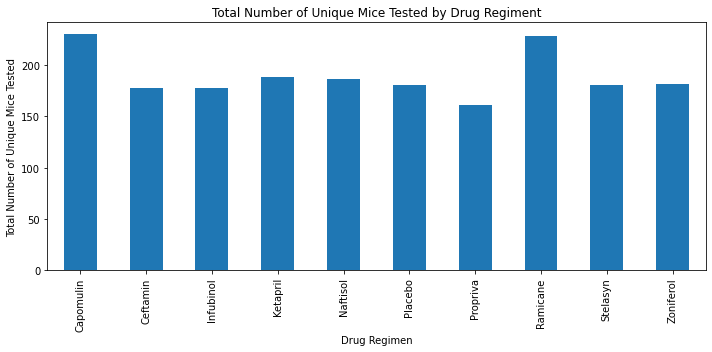

In [366]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

#Group Drug Regiment and Mouse ID together to plot 
mouse_drug_group.plot(kind="bar", figsize=(10,5))

#Chart Titles
plt.title("Total Number of Unique Mice Tested by Drug Regiment")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Unique Mice Tested")
plt.tight_layout()

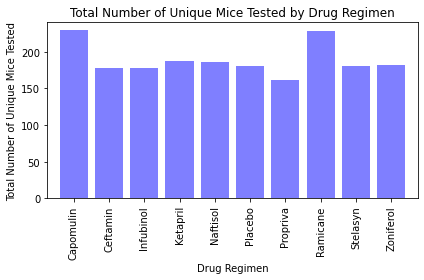

In [408]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
mice = [230,178,178,188,186,181,161,228,181,182]
x_axis = np.arange(len(mouse_drug_group))

plt.bar(x_axis,mice,color='b', alpha = 0.5, align = "center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol","Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]);
plt.xticks(rotation=90)

#set the x limits of the current chart 
plt.xlim(-0.75, len(x_axis)-0.25)

#set the y limits of the current chart 
plt.ylim(0,max(mice)+10)

#Give our chart some labels and titles 
plt.title("Total Number of Unique Mice Tested by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Unique Mice Tested")
plt.tight_layout()


In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
